<a href="https://colab.research.google.com/github/cpeiret/CSC8635/blob/main/CSC8635_Machine_Learning_with_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [114]:
# Load data
url_train = 'https://raw.githubusercontent.com/cpeiret/CSC8635/main/train.csv'
train = pd.read_csv(url_train)

url_test = 'https://raw.githubusercontent.com/cpeiret/CSC8635/main/testdata_with_groundTruth.csv'
test = pd.read_csv(url_test)

In [ ]:
train.info()
train.describe()

In [ ]:
test.info()
test.describe()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Parents and Children')

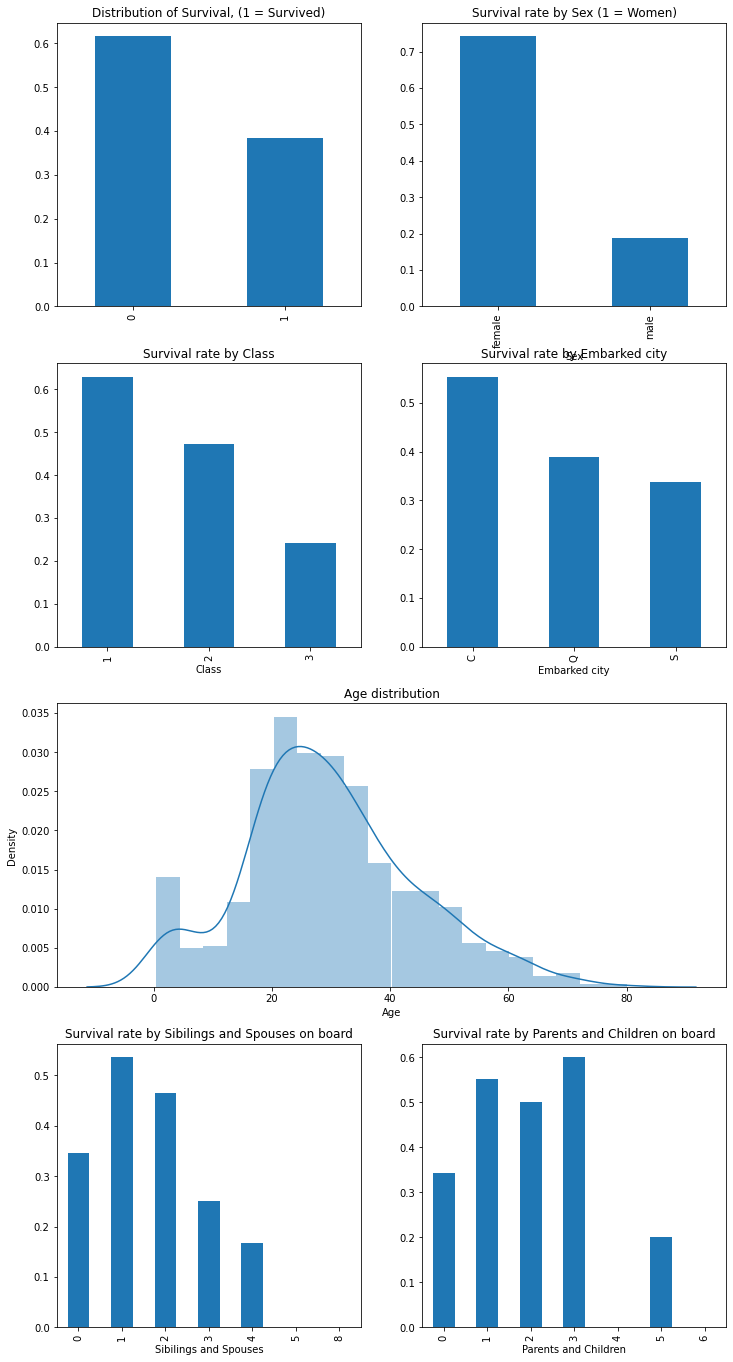

In [62]:
# Plot variables
fig = plt.figure(figsize=(12,24))

plt.subplot2grid((4,2),(0,0))
train.Survived.value_counts(normalize=True).plot(kind='bar')
plt.title("Distribution of Survival, (1 = Survived)")

plt.subplot2grid((4,2),(0,1))
train.groupby("Sex")["Survived"].mean().plot(kind = "bar")
plt.title("Survival rate by Sex (1 = Women)")
plt.xlabel("Sex")

plt.subplot2grid((4,2),(1,0))
train.groupby("Pclass")["Survived"].mean().plot(kind = "bar")
plt.title("Survival rate by Class")
plt.xlabel("Class")

plt.subplot2grid((4,2),(1,1))
train.groupby("Embarked")["Survived"].mean().plot(kind = "bar")
plt.title("Survival rate by Embarked city")
plt.xlabel("Embarked city")

plt.subplot2grid((4,2),(2,0), colspan=2)
sns.distplot(train['Age'],kde=True)
plt.title("Age distribution")
plt.xlabel("Age")

plt.subplot2grid((4,2),(3,0))
train.groupby("SibSp")["Survived"].mean().plot(kind = "bar")
plt.title("Survival rate by Sibilings and Spouses on board")
plt.xlabel("Sibilings and Spouses")

plt.subplot2grid((4,2),(3,1))
train.groupby("Parch")["Survived"].mean().plot(kind = "bar")
plt.title("Survival rate by Parents and Children on board")
plt.xlabel("Parents and Children")

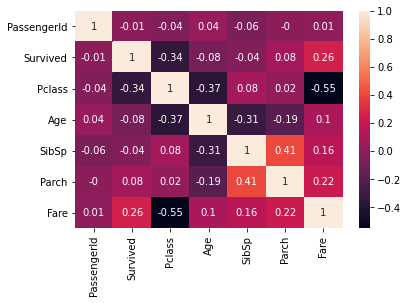

In [63]:
# Correlation matrix & heatmap
correlation_matrix = train.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [115]:
# Input Age missing values based on Title

train['Title'] = train.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()) # Get titles
normalised_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
train.Title = train.Title.map(normalised_titles)
print(train.Title.value_counts())
grouped = train.groupby(['Sex','Pclass', 'Title'])
grouped.Age.median()
train.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))


Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64


In [116]:
# Same thing for test data
test['Title'] = test.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()) # Get titles
normalised_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
test.Title = test.Title.map(normalised_titles)
print(test.Title.value_counts())
grouped = test.groupby(['Sex','Pclass', 'Title'])
grouped.Age.median()
test.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))


Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Royalty      1
Name: Title, dtype: int64


In [ ]:
train.info()
train.describe()

In [ ]:
test.info()
test.describe()

In [117]:
# Create age groups
data = [train, test]
for datasets in data:
  datasets['AgeGroup'] = datasets['Age'].astype(int)
  datasets.loc[(datasets["Age"] <= 15), "AgeGroup"] = "<= 15"
  datasets.loc[(datasets["Age"] > 15) & (datasets["Age"] <= 25), "AgeGroup"] = "16-25"
  datasets.loc[(datasets["Age"] > 25) & (datasets["Age"] <= 35), "AgeGroup"] = "26-35"
  datasets.loc[(datasets["Age"] > 35) & (datasets["Age"] <= 45), "AgeGroup"] = "36-45"
  datasets.loc[(datasets["Age"] > 45) & (datasets["Age"] <= 55), "AgeGroup"] = "46-55"
  datasets.loc[(datasets["Age"] > 55) & (datasets["Age"] <= 65), "AgeGroup"] = "56-65"
  datasets.loc[(datasets["Age"] > 65), "AgeGroup"] = ">65"

In [118]:
# Calcualte family size
data = [train, test]
for datasets in data:
  datasets['FamilySize'] = train.Parch + train.SibSp + 1

In [119]:
# Convert variables into dummies
train = pd.get_dummies(train,columns=['Pclass','Sex','FamilySize','Embarked','AgeGroup', ]) # Create dummy variables
test = pd.get_dummies(test,columns=['Pclass','Sex','FamilySize','Embarked','AgeGroup', ])

In [120]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_16-25,AgeGroup_26-35,AgeGroup_36-45,AgeGroup_46-55,AgeGroup_56-65,AgeGroup_<= 15,AgeGroup_>65
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,Mr,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,Mrs,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,Mrs,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,Mr,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [121]:
# Separate data for training and testing
X_train = train.drop(columns=['Survived','Name', 'Age', 'Ticket', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Title'])
X_test = test.drop(columns=['Survived','Name', 'Age', 'Ticket', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Title'])

y_train = train.Survived.values
y_test = test.Survived.values

In [108]:
# Drop variables we are not going to use in the model
train_df = train_df.drop(columns=['Name', 'Age', 'Ticket', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Title'])

test_df = test_df.drop(columns=['Name', 'Age', 'Ticket', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Title'])